<a href="https://colab.research.google.com/github/leptoquark/MapStore/blob/master/frasal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FRASAL
Il file è stato preparato per essere analizzato con le categorie.

In [35]:
import os
import tarfile
import urllib.request

DOWNLOAD_FILE = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSL7SdxKVAe864US4WNcKQiwFNHR8qf4SG5fWy0R4wpFNX5ECGgOlrqMZ1yvGtKPG9k2lHI5caxmt_B/pub?gid=273652227&single=true&output=csv"
DATA_DIR  = "dataset_frasal" 
DATA_FILE = "frasal_data.csv"
DATA_PATH = os.path.join(DATA_DIR,DATA_FILE)

def fetch_frasal_data(file_url=DOWNLOAD_FILE,data_path=DATA_PATH):
    os.makedirs(DATA_DIR, exist_ok=True)
    urllib.request.urlretrieve(file_url,data_path)

fetch_frasal_data();

In [37]:
import pandas as pd

def load_frasal_data(data_path=DATA_PATH):
  return pd.read_csv(data_path)

data = load_frasal_data()

In [38]:
data.head()

,misura term. mand.,misura term. Rit.,misura term. mand..1,misura term. Rit..1,Temp. Ambiente,Delta pressione differenziale,Delta Pressione Filtri polveri grandi [Pa],Delta Pressione Filtri polveri sottili [Pa],Misuratori amperometrici,Classe,Classe N/P
0,7.0,12.0,16.0,26.0,26.0,4.0,105,115,3.5,N,N
1,7.0,12.0,16.0,26.0,26.0,4.2,105,115,3.5,N,N
2,7.0,12.0,16.0,26.0,26.0,4.1,105,115,3.6,N,N
3,7.0,12.0,16.0,26.0,26.0,4.3,105,115,3.5,N,N
4,7.0,12.0,16.0,26.0,26.0,4.4,105,115,3.6,N,N


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   misura term. mand.                           153 non-null    float64
 1   misura term. Rit.                            153 non-null    float64
 2   misura term. mand..1                         153 non-null    float64
 3   misura term. Rit..1                          153 non-null    float64
 4   Temp. Ambiente                               153 non-null    float64
 5   Delta pressione differenziale                153 non-null    float64
 6   Delta Pressione Filtri polveri grandi [Pa]   153 non-null    int64  
 7   Delta Pressione Filtri polveri sottili [Pa]  153 non-null    int64  
 8   Misuratori amperometrici                     153 non-null    float64
 9   Classe                                       153 non-null    object 
 10  Cl

In [40]:
data["Classe"].value_counts()

F    51
P    28
V    22
C    20
N    19
A    13
Name: Classe, dtype: int64

In [41]:
data["Classe N/P"].value_counts()

P    134
N     19
Name: Classe N/P, dtype: int64

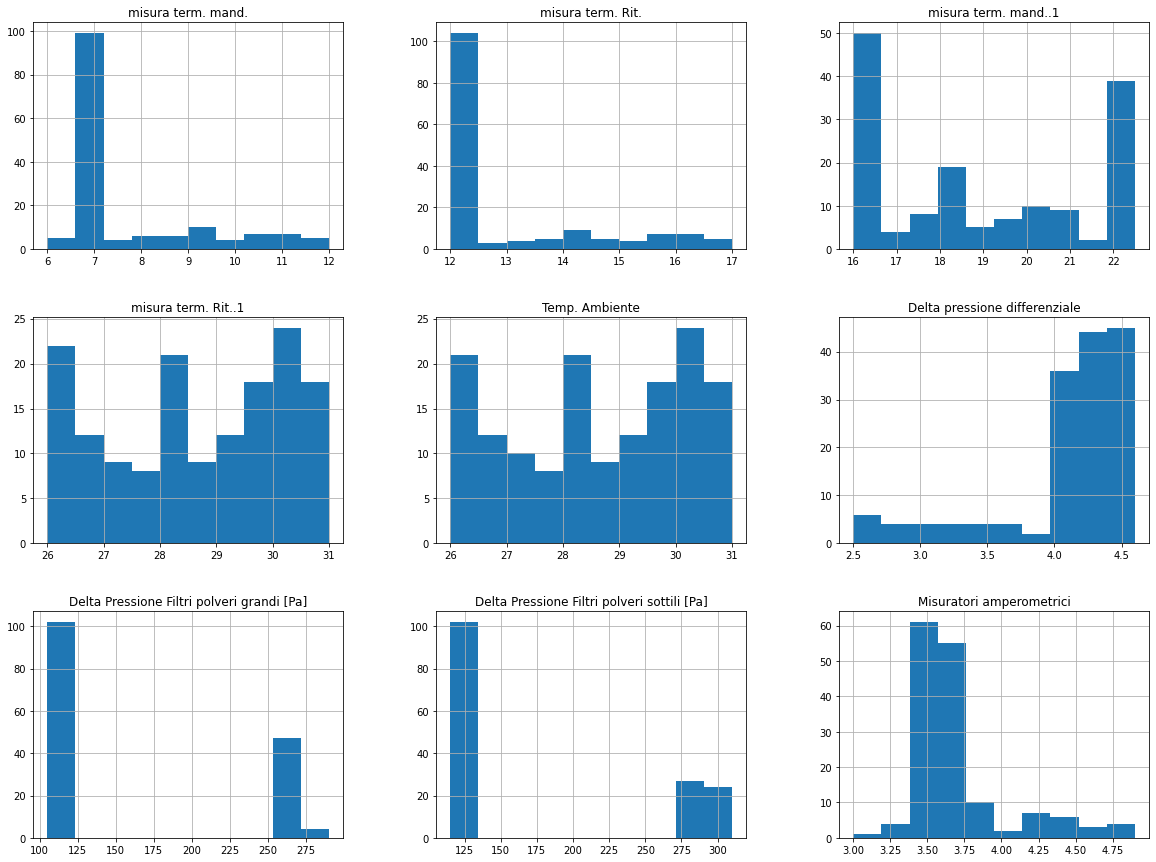

In [42]:
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(20,15))
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data,test_size=0.2,random_state=42)

In [44]:
corr_matrix = data.corr()
corr_matrix["Temp. Ambiente"].sort_values(ascending=False)

Temp. Ambiente                                 1.000000
misura term. Rit..1                            0.998686
misura term. mand..1                           0.872261
Delta Pressione Filtri polveri grandi [Pa]     0.585397
Delta Pressione Filtri polveri sottili [Pa]    0.583349
misura term. mand.                             0.367628
misura term. Rit.                              0.339895
Misuratori amperometrici                      -0.126814
Delta pressione differenziale                 -0.248002
Name: Temp. Ambiente, dtype: float64

In [9]:
corr_matrix["Delta Pressione Filtri polveri grandi [Pa]"].sort_values(ascending=False)

Delta Pressione Filtri polveri grandi [Pa]     1.000000
Delta Pressione Filtri polveri sottili [Pa]    0.999724
misura term. mand..1                           0.833817
Temp. Ambiente                                 0.585397
misura term. Rit..1                            0.577046
Delta pressione differenziale                  0.307953
Misuratori amperometrici                      -0.166819
misura term. mand.                            -0.393737
misura term. Rit.                             -0.419767
Name: Delta Pressione Filtri polveri grandi [Pa], dtype: float64

In [10]:
corr_matrix["misura term. Rit."].sort_values(ascending=False)

misura term. Rit.                              1.000000
misura term. mand.                             0.993344
misura term. Rit..1                            0.340635
Temp. Ambiente                                 0.339895
misura term. mand..1                           0.093606
Misuratori amperometrici                      -0.295690
Delta Pressione Filtri polveri grandi [Pa]    -0.419767
Delta Pressione Filtri polveri sottili [Pa]   -0.420253
Delta pressione differenziale                 -0.719916
Name: misura term. Rit., dtype: float64

In [46]:
from sklearn import tree

training_data = train_set.drop("Classe",axis=1)
training_data = training_data.drop("Classe N/P",axis=1)
training_data = training_data.values

training_label    = train_set["Classe"].copy()
training_label_01 = train_set["Classe N/P"].copy()

tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(training_data, training_label_01)

text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_4 <= 26.25
|   |--- feature_0 <= 6.50
|   |   |--- class: P
|   |--- feature_0 >  6.50
|   |   |--- class: N
|--- feature_4 >  26.25
|   |--- class: P



In [49]:
from sklearn.neural_network import MLPClassifier

NN_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN_clf = NN_clf.fit(training_data, training_label)

from sklearn import svm
svm_clf = svm.SVC()

In [48]:
from sklearn.model_selection import cross_val_score

test_data  = test_set.drop("Classe",axis=1)
test_label = test_set["Classe"].copy()

print (cross_val_score(tree_clf,training_data,training_label,cv=3, scoring="accuracy"))
print(cross_val_score(tree_clf,test_data,test_label,cv=3, scoring="accuracy"))

print(cross_val_score(NN_clf,training_data,training_label,cv=3, scoring="accuracy"))
print(cross_val_score(NN_clf,test_data,test_label,cv=3, scoring="accuracy"))

print(cross_val_score(svm_clf,training_data,training_label,cv=3, scoring="accuracy"))
print(cross_val_score(svm_clf,test_data,test_label,cv=3, scoring="accuracy"))


[0.97560976 0.95121951 1.        ]
[nan nan nan]
[0.34146341 0.34146341 0.325     ]
[nan nan nan]
[0.51219512 0.48780488 0.5       ]
[nan nan nan]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 166, in fit
    X, y, validate_separately=(check_X_params, check_y_params)
  File "/usr/local/lib/python3.7/dist-package

In [31]:
from joblib import dump, load
dump(tree_clf, 'frasal_model.joblib')

['frasal_model.joblib']

In [34]:

predict_clf = load('frasal_model.joblib')
st = [7.0, 12.0, 16.0,	26.0,	26.0,	4.0,	105,	115,	3.5]
print(predict_clf.predict([st]))

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(training_data,training_label)

['N']


RandomForestClassifier(n_estimators=10)